## Demo of PTAS Algorithm for Maximal Disjoint Subset of Unit Disks

**Parameters:**

In [1]:
WIDTH  = 30
HEIGHT = 30
k = [3,5,7,10]

### 1. Generate Unit Disks 

In [2]:
%matplotlib notebook
import pandas as pd
from aux import *
from grid import *

**Interactive selection:**

<IPython.core.display.Javascript object>


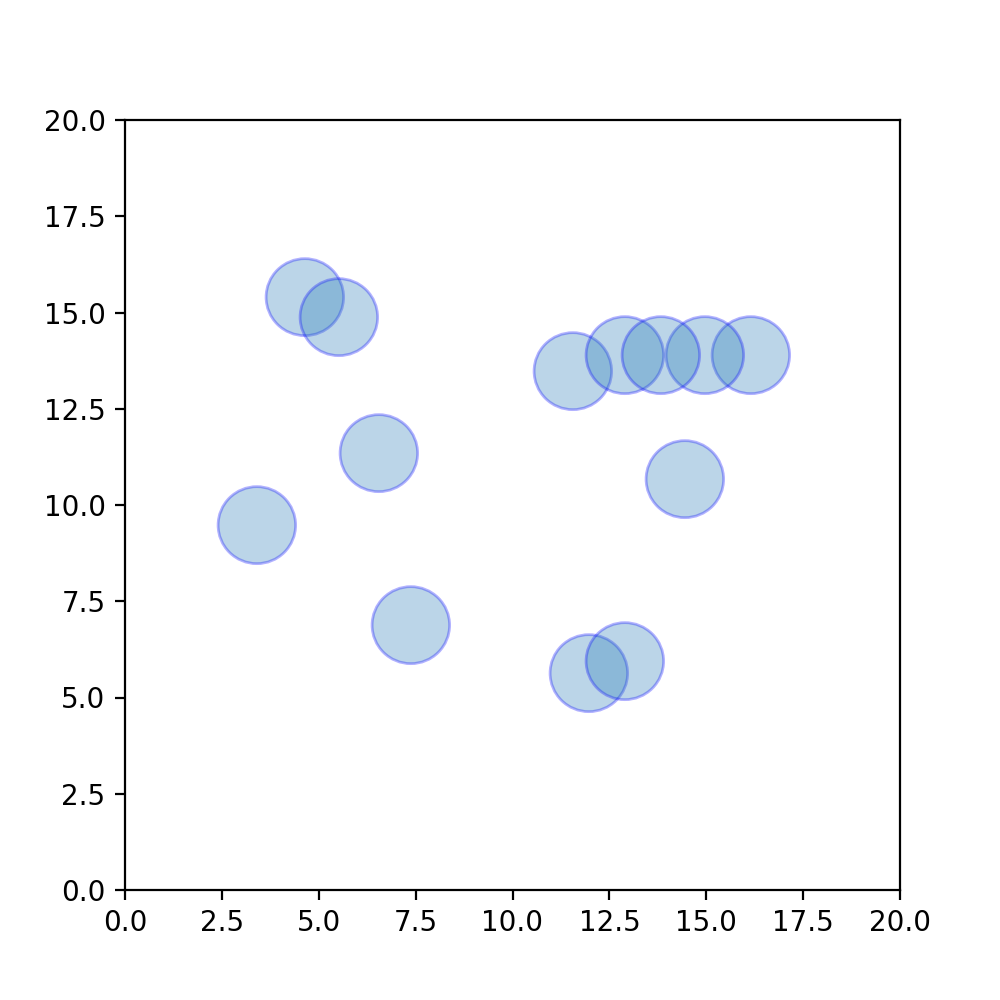

In [3]:
disk_geoms = []
select_disks_interactively(WIDTH, HEIGHT, disk_geoms)

**Randomized selection:**

<IPython.core.display.Javascript object>


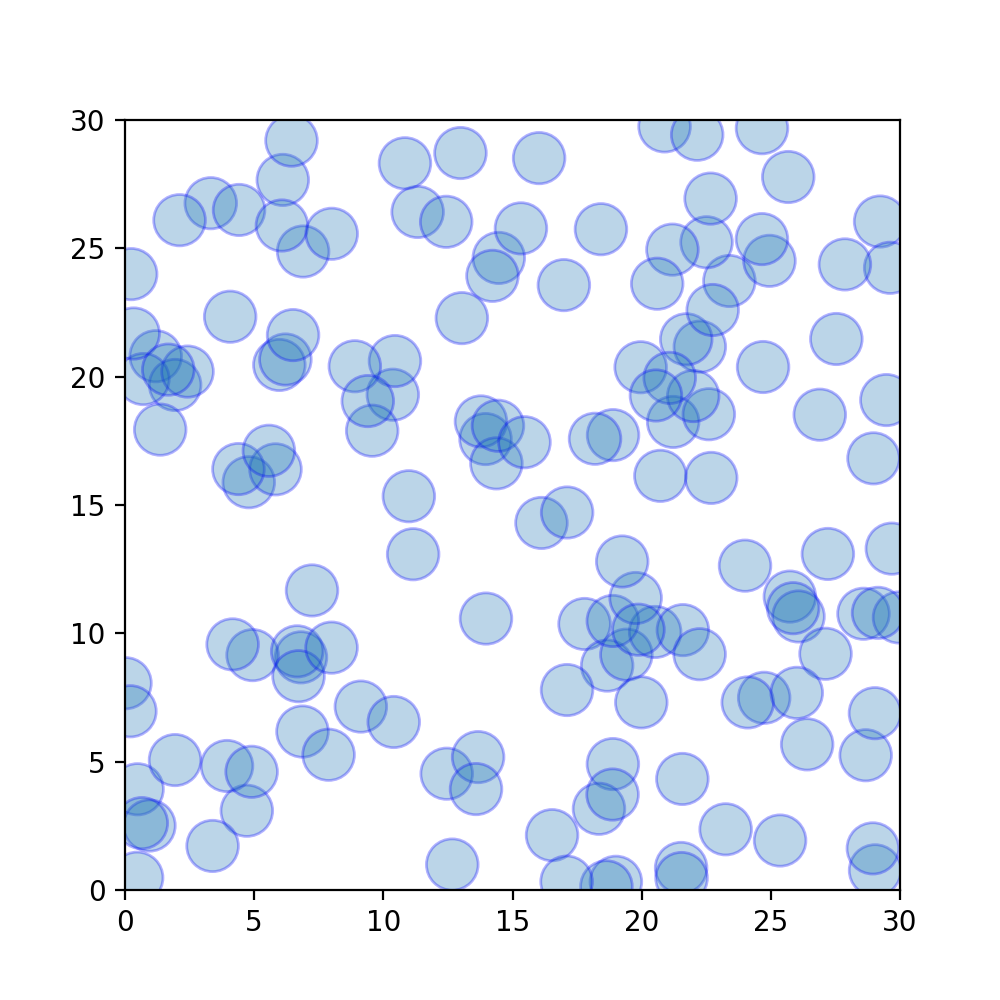

In [3]:
n_points = 150
disk_geoms = []
select_disks_randomly(WIDTH, HEIGHT, n_points, disk_geoms)

### 2. Run Approximation Algorithm

<IPython.core.display.Javascript object>


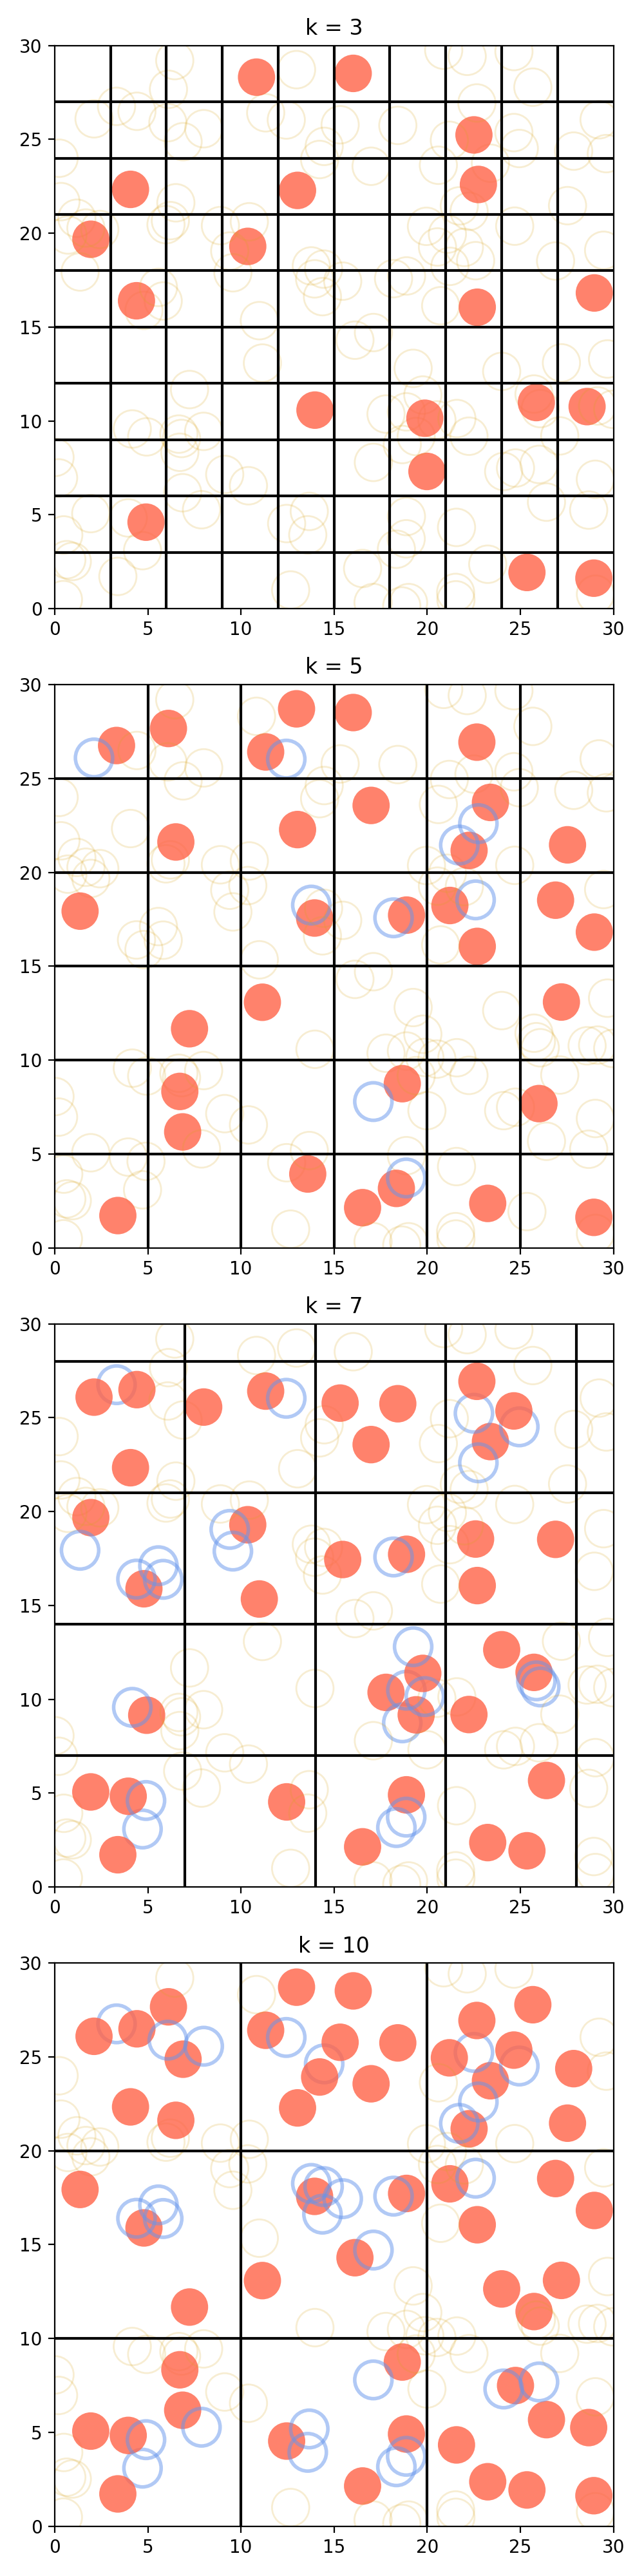

In [4]:
fig, axes = plt.subplots(nrows=len(k), ncols=1, figsize=(5,5*len(k)))
axes = axes.ravel()
results = {}
for k_i, ax in zip(k, axes):
    grid = Grid(k_i, WIDTH, HEIGHT)
    grid.add_unit_disks(disk_geoms)
    alg_stats = grid.demo_alg(fig, ax, calc_n_optimal=False)
    ax.set_title(f"k = {k_i}")
    fig.canvas.flush_events()
    results[k_i] = alg_stats
fig.tight_layout()

In [5]:
results_df = pd.DataFrame(results).T
results_df.columns = ["# orig disks", "# in approx max packing", "# removed", "# in true max packing"]
results_df.index.name = "k"
display(results_df)

,# orig disks,# in approx max packing,# removed,# in true max packing
k,,,,
3,150.0,19.0,131.0,NaN
5,150.0,32.0,109.0,NaN
7,150.0,36.0,91.0,NaN
10,150.0,52.0,69.0,NaN



Expected # removed = O(n/k) (since probability of removal for each disk is 4/k)

In [ ]:
n_optimal = len(grid._get_maximal_disjoint_subset([c for a in list(grid.grid.values()) for c in a]))